<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/SSDModelOnCityPersonDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SSD (Single Shot MultiBox Detector) Implementation on CityPerson Dataset

### Step 1: Extract and read the datasets

In [45]:
# import required libraries
import os
import zipfile
import torch
import torchvision
import cv2
import json
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from collections import Counter
import pandas as pd
from torchvision.models.detection.ssd import SSD300_VGG16_Weights

In [2]:
# Dataset zip files path from Google Drive
#gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'
gtBbox = '/content/drive/MyDrive/CityPersonDataset/gtBbox_cityPersons_trainval.zip'

#gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'
gtBbox_ExtPath = '/content/CityPersonDataset/gtBbox_cityPersons_trainval'

In [3]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
#extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)
extract_zip(gtBbox, gtBbox_ExtPath)

In [4]:
# List the extracted content from both datasets
#gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)
gtBbox_Files = os.listdir(gtBbox_ExtPath)

#gtFine_Files,
gtFinepano_Files, gtBbox_Files

(['license.txt', 'README_panopticParts.md', 'gtFinePanopticParts'],
 ['license.txt', 'gtBboxCityPersons', 'README_cityPersons'])

In [5]:
# Path to core folder
#gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')
gtBbox_CorePath = os.path.join(gtBbox_ExtPath, 'gtBboxCityPersons')

# List driectories inside core folders
#gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []
gtBbox_Dirs = os.listdir(gtBbox_CorePath) if os.path.exists(gtBbox_CorePath) else []

#gtFine_Dirs,
gtFinePano_Dirs, gtBbox_Dirs

(['train', 'val'], ['train', 'val'])

In [6]:
# Define the subdirectories
subdirs = gtBbox_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
#gtFine_CityFolders = {}
gtFinePano_CityFolders = {}
gtBbox_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    #gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []
    gtBbox_CityFolders[subdir] = os.listdir(os.path.join(gtBbox_CorePath, subdir)) if subdir in gtBbox_Dirs else []

# Output the first few files for each subdirectory
#gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}
gtBbox_CityFolders_Preview = {key: value[:] for key, value in gtBbox_CityFolders.items()}

#gtFine_CityFolders_Preview,
gtFinePano_CityFolders_Preview, gtBbox_CityFolders_Preview

({'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']},
 {'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']})

In [7]:
# Count the distribution of file types in a given directory
def count_file_types(directory):
    if not os.path.exists(directory):
      print(f"Error: Directory '{directory}' not found.")
      return None

    file_type_counts = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            file_type_counts[ext] += 1
    return file_type_counts

# # File type distribution for gtFine dataset
# print("File Type Distribution in gtFine Dataset:")
# gtFine_file_types = count_file_types(gtFine_CorePath)
# print(pd.DataFrame(gtFine_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtFinePanopticParts dataset
print("\nFile Type Distribution in gtFinePanopticParts Dataset:")
gtFinePano_file_types = count_file_types(gtFinePano_CorePath)
print(pd.DataFrame(gtFinePano_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtBboxCityPersons dataset
print("\nFile Type Distribution in gtBboxCityPersons Dataset:")
gtBbox_file_types = count_file_types(gtBbox_CorePath)
print(pd.DataFrame(gtBbox_file_types.items(), columns=["File Type", "Count"]))


File Type Distribution in gtFinePanopticParts Dataset:
  File Type  Count
0      .tif   3475

File Type Distribution in gtBboxCityPersons Dataset:
  File Type  Count
0     .json   3475


In [29]:
# Dataset zip files path from Google Drive
#gtFine_Org = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts_Org = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'
gtBbox_Org = '/content/drive/MyDrive/CityPersonDataset/gtBbox_cityPersons_trainval.zip'

#gtFine_Org_ExtPath = '/content/CityPersonDataset_Org/gtFine_trainvaltest'
gtFinePano_ChangedFormat_ExtPath = '/content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval'
gtBbox_ChangedFormat_ExtPath = '/content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval'

In [30]:
#%rm -rf /content/CityPersonDataset_ChangedFormat

In [31]:
# Extract both datasets zip files
# extract_zip(gtFine_Org, gtFine_ExtPath)
extract_zip(gtFinePanopticParts_Org, gtFinePano_ChangedFormat_ExtPath)
extract_zip(gtBbox_Org, gtBbox_ChangedFormat_ExtPath)

In [32]:
# Path to core folder
# gtFine_Org_CorePath = os.path.join(gtFine_Org_ExtPath, 'gtFine')
gtFinePano_ChangedFormat_CorePath = os.path.join(gtFinePano_ChangedFormat_ExtPath, 'gtFinePanopticParts')
gtBbox_ChangedFormat_CorePath = os.path.join(gtBbox_ChangedFormat_ExtPath, 'gtBboxCityPersons')

In [33]:
gtFinePano_ChangedFormat_CorePath, gtBbox_ChangedFormat_CorePath

('/content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval/gtFinePanopticParts',
 '/content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval/gtBboxCityPersons')

In [34]:
# List driectories inside core folders
#gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_ChangedFormat_Dirs = os.listdir(gtFinePano_ChangedFormat_CorePath) if os.path.exists(gtFinePano_ChangedFormat_CorePath) else []
gtBbox_ChangedFormat_Dirs = os.listdir(gtBbox_ChangedFormat_CorePath) if os.path.exists(gtBbox_ChangedFormat_CorePath) else []

#gtFine_Dirs,
gtFinePano_ChangedFormat_Dirs, gtBbox_ChangedFormat_Dirs

(['train', 'val'], ['train', 'val'])

In [35]:
##############################################
# # File type distribution for gtFine dataset
# print("File Type Distribution in gtFine Dataset:")
# gtFine_file_types = count_file_types(gtFine_CorePath)
# print(pd.DataFrame(gtFine_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtFinePanopticParts dataset
print("\nFile Type Distribution in gtFinePanopticParts Dataset:")
gtFinePano_ChangedFormat_file_types = count_file_types(gtFinePano_ChangedFormat_CorePath)
print(pd.DataFrame(gtFinePano_ChangedFormat_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtBboxCityPersons dataset
print("\nFile Type Distribution in gtBboxCityPersons Dataset:")
gtBbox_ChangedFormat_file_types = count_file_types(gtBbox_ChangedFormat_CorePath)
print(pd.DataFrame(gtBbox_ChangedFormat_file_types.items(), columns=["File Type", "Count"]))


File Type Distribution in gtFinePanopticParts Dataset:
  File Type  Count
0      .tif   3475

File Type Distribution in gtBboxCityPersons Dataset:
  File Type  Count
0     .json   3475


In [36]:
# Define the subdirectories
subdirs = gtBbox_ChangedFormat_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
#gtFine_CityFolders = {}
gtFinePano_ChangedFormat_CityFolders = {}
gtBbox_ChangedFormat_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    #gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_ChangedFormat_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_ChangedFormat_CorePath, subdir)) if subdir in gtFinePano_Dirs else []
    gtBbox_ChangedFormat_CityFolders[subdir] = os.listdir(os.path.join(gtBbox_ChangedFormat_CorePath, subdir)) if subdir in gtBbox_Dirs else []

# Output the first few files for each subdirectory
#gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_ChangedFormat_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_ChangedFormat_CityFolders.items()}
gtBbox_ChangedFormat_CityFolders_Preview = {key: value[:] for key, value in gtBbox_ChangedFormat_CityFolders.items()}

#gtFine_CityFolders_Preview,
gtFinePano_ChangedFormat_CityFolders_Preview, gtBbox_ChangedFormat_CityFolders_Preview

({'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']},
 {'train': ['zurich',
   'hanover',
   'bochum',
   'bremen',
   'aachen',
   'cologne',
   'hamburg',
   'darmstadt',
   'erfurt',
   'tubingen',
   'jena',
   'dusseldorf',
   'krefeld',
   'strasbourg',
   'monchengladbach',
   'ulm',
   'stuttgart',
   'weimar'],
  'val': ['lindau', 'frankfurt', 'munster']})

In [38]:
# Convert .json to .txt
def convert_json_to_txt(directory):
    for root, _, files in tqdm(os.walk(directory), desc="Converting JSON to TXT"):
        for file in files:
            if file.endswith(".json"):
                json_path = os.path.join(root, file)
                txt_path = os.path.join(root, file.replace(".json", ".txt"))

                with open(json_path, "r", encoding="utf-8") as json_file:
                    data = json.load(json_file)

                with open(txt_path, "w", encoding="utf-8") as txt_file:
                    txt_file.write(json.dumps(data, indent=4))  # Save JSON content in readable format

                os.remove(json_path)  # Remove original JSON file

# Run conversions
convert_json_to_txt(gtBbox_ChangedFormat_CorePath)

Converting JSON to TXT: 24it [00:00, 2155.25it/s]


In [40]:
# Function to convert .tif to .jpg
def convert_tif_to_jpg(directory):
    for root, _, files in tqdm(os.walk(directory), desc="Converting TIF to JPG"):
        for file in files:
            if file.endswith(".tif"):
                tif_path = os.path.join(root, file)
                jpg_path = os.path.join(root, file.replace(".tif", ".jpg"))

                try:
                    # Open image with PIL
                    image = Image.open(tif_path)

                    # Convert to RGB (if needed) and save as JPG
                    image.convert("RGB").save(jpg_path, "JPEG", quality=95)
                    os.remove(tif_path)  # Remove the original .tif file
                except Exception as e:
                    print(f"Failed to convert: {tif_path}, Error: {e}")

# Run conversion
convert_tif_to_jpg(gtFinePano_ChangedFormat_CorePath)

Converting TIF to JPG: 24it [04:13, 10.55s/it]


In [50]:
# Parse a TXT annotation file function
def parse_txt_file(txt_path):
    with open(txt_path, 'r') as file:
        data = file.readlines()
    print("Contents of TXT file:")
    for line in data[:5]:  # Print first 10 lines for preview
        print(line.strip())
    return data

# Create a list of all TXT files from gtBbox
def get_txt_files(directory):
    txt_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                txt_files.append(os.path.join(root, file))
    return txt_files

gtBbox_txt_files = get_txt_files(gtBbox_ChangedFormat_CorePath)
#gtBbox_txt_files

Randomly Selected TXT file: /content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/hanover/hanover_000000_042992_gtBboxCityPersons.txt
Contents of TXT file:
{
"imgHeight": 1024,
"imgWidth": 2048,
"objects": [
{
Corresponding JPG file: /content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval/gtFinePanopticParts/train/hanover/hanover_000000_042992_gtFinePanopticParts.jpg


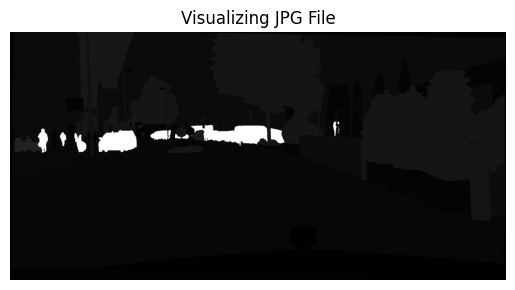

In [51]:
# Randomly select a TXT file from gtBbox
if not gtBbox_txt_files:
    print("No TXT files found in gtBbox dataset.")
else:
    sample_txt = random.choice(gtBbox_txt_files)
    print(f"Randomly Selected TXT file: {sample_txt}")
    sample_gtBbox_data = parse_txt_file(sample_txt)

    # Derive the corresponding .jpg file path in gtFinePanopticParts
    txt_filename = os.path.basename(sample_txt)
    jpg_filename = txt_filename.replace('_gtBboxCityPersons.txt', '_gtFinePanopticParts.jpg')

    jpg_file_path = None
    for root, _, files in os.walk(gtFinePano_ChangedFormat_CorePath):
        for file in files:
            if file == jpg_filename:
                jpg_file_path = os.path.join(root, file)
                break
        if jpg_file_path:
            break

    # Visualize the .jpg file if it exists
    if jpg_file_path:
        print(f"Corresponding JPG file: {jpg_file_path}")
        jpg_image = Image.open(jpg_file_path)
        plt.imshow(jpg_image)
        plt.title("Visualizing JPG File")
        plt.axis('off')  # Turn off axis for better visualization
        plt.show()
    else:
        print(f"No corresponding JPG file found for {sample_txt}")

In [52]:
import torchvision.transforms as transforms
from torch.utils.data import Dataset

In [53]:
class CityPersonsDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_paths = []
        self.label_paths = []

        # Get image and annotation file paths
        for city in os.listdir(images_dir):
            city_image_path = os.path.join(images_dir, city)
            city_label_path = os.path.join(labels_dir, city)

            if os.path.isdir(city_image_path) and os.path.isdir(city_label_path):
                for img_name in os.listdir(city_image_path):
                    if img_name.endswith('.jpg'):
                        img_path = os.path.join(city_image_path, img_name)
                        label_path = os.path.join(city_label_path, img_name.replace('.jpg', '.txt'))
                        if os.path.exists(label_path):
                            self.image_paths.append(img_path)
                            self.label_paths.append(label_path)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label_path = self.label_paths[idx]

        # Load image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load bounding boxes
        boxes = []
        labels = []
        with open(label_path, 'r') as f:
            for line in f.readlines():
                data = list(map(float, line.strip().split()))
                class_id, x, y, width, height = data
                boxes.append([x, y, x + width, y + height])  # Convert to [x_min, y_min, x_max, y_max]
                labels.append(int(class_id))

        # Convert to tensors
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        # Apply transformations if provided
        if self.transform:
            transformed = self.transform(image=image)
            image = transformed

        # Return image and target dictionary
        target = {"boxes": boxes, "labels": labels}
        return image, target

In [54]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((300, 300)),  # SSD300 requires 300x300 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [55]:
# Define paths
train_img_dir = "/content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval/gtFinePanopticParts/train"
train_label_dir = "/content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval/gtBboxCityPersons/train"

val_img_dir = "/content/CityPersonDataset_ChangedFormat/gtFinePanopticParts_trainval/gtFinePanopticParts/val"
val_label_dir = "/content/CityPersonDataset_ChangedFormat/gtBbox_cityPersons_trainval/gtBboxCityPersons/val"

# Create dataset instances
train_dataset = CityPersonsDataset(train_img_dir, train_label_dir, transform=transform)
val_dataset = CityPersonsDataset(val_img_dir, val_label_dir, transform=transform)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Check dataset size
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

ValueError: num_samples should be a positive integer value, but got num_samples=0